<a href="https://colab.research.google.com/github/Morrissenzeyi/week-4-IP/blob/main/Independent_Project_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Data Cleaning and Analysis - electric car-sharing service company**

1.0 Importing our Libraries

In [1]:
# Importing the pandas library
import pandas as pd
# Importing the numpy library
import numpy as np


1.1 Reading the Dataset from our CSV file


In [2]:
df = pd.read_csv('/content/Autolib_dataset (2).csv')
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


1.3 Accessing Information about our Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

# 1.4 Cleaning our Dataset

1.41 **Validity**

In [4]:
# First we drop the columns which are not useful in our data analysis
df.drop('Displayed comment', axis = 1, inplace = True)

In [5]:
df.drop('Geo point', axis = 1, inplace = True)

df.drop('Subscription status', axis = 1, inplace = True)

In [6]:
df.drop('Scheduled at', axis = 1, inplace = True)

In [7]:
df.drop('Cars', axis = 1, inplace = True)

In [8]:
df.drop('Charge Slots', axis = 1, inplace = True)
df.drop('Slots', axis = 1, inplace = True)
df.drop('Station type', axis = 1, inplace = True)
df.drop('Rental status', axis = 1, inplace = True)
df.drop('ID', axis = 1, inplace = True)


1.4.2 **Accuracy** 

In [9]:
#Dropping all rows where the value of 'Bluecar counter' is less than 0 or greater than 7

df_removing = df.loc[(df['Bluecar counter'] < 0) & (df['Bluecar counter'] > 7), 'Bluecar counter']
df_removing.shape

(0,)

In [10]:
#Dropping all rows where the value of 'Utilib counter' is less than 0 or greater than 4
df_removing_util_counter = df.loc[(df['Utilib counter'] < 0) & (df['Utilib counter'] > 4), 'Utilib counter']
df_removing_util_counter.shape

(0,)

In [11]:
#Dropping all rows where the value of 'Utilib 1.4 counter' is less than 0 or greater than 5
df_removing_utilib = df.loc[(df['Utilib 1.4 counter'] < 0) & (df['Utilib 1.4 counter'] > 4), 'Utilib 1.4 counter']
df_removing_utilib.shape

(0,)

In [12]:
#Dropping all rows where the value of 'year' is not 2018
df_year = df.loc[df['year'] != 2018, 'year']
df_year.shape

(0,)

# 1.4.3 Completeness

In [13]:
# we go ahead and check if we have any null or missing values
df.isnull().values.any()
df.isnull().sum()

Address               0
Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
Charging Status       0
City                  0
Kind                  0
Postal code           0
Public name           0
Status                0
year                  0
month                 0
day                   0
hour                  0
minute                0
dtype: int64

In [14]:
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charging Status,City,Kind,Postal code,Public name,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,nonexistent,Paris,STATION,75015,Paris/Suffren/2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,operational,Paris,STATION,75014,Paris/Raymond Losserand/145,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,operational,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,operational,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,nonexistent,Paris,PARKING,75017,Paris/Porte de Champerret/6,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,nonexistent,Colombes,STATION,92700,Colombes/MÃ©nelotte/8,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,operational,Paris,STATION,75015,Paris/Dantzig/37,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,operational,Paris,STATION,75007,Paris/Bac/142,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,nonexistent,Fontenay-Sous-Bois,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,ok,2018,4,4,17,27


# Consistency

In [15]:
# We also check for duplicate values so as to drop them
df.duplicated()
df.duplicated().sum()

0

# Uniformity

In [16]:
#changing column names to lower case and make columns appearing
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(5)

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charging_status,city,kind,postal_code,public_name,status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,nonexistent,Paris,STATION,75015,Paris/Suffren/2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,operational,Paris,STATION,75014,Paris/Raymond Losserand/145,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,operational,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,operational,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,nonexistent,Paris,PARKING,75017,Paris/Porte de Champerret/6,ok,2018,4,8,17,23


# Finding Outliers

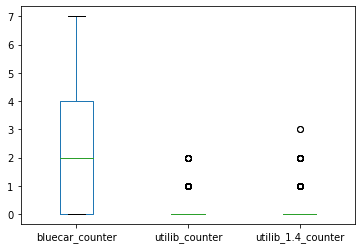

In [17]:
df.boxplot(column =['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter'], grid = False)

In [26]:
# we can also use the rule of thumb to calculate the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1


(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

,Bluecar_Dif,address,bluecar_counter,charging_status,city,day,hour,kind,minute,month,postal_code,public_name,status,utilib_1.4_counter,utilib_counter,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# **Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.**

In [18]:
#let's make the city == Paris
df_paris = df[df.city == 'Paris']
df_paris

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charging_status,city,kind,postal_code,public_name,status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,nonexistent,Paris,STATION,75015,Paris/Suffren/2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,operational,Paris,STATION,75014,Paris/Raymond Losserand/145,ok,2018,4,6,7,24
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,operational,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,nonexistent,Paris,PARKING,75017,Paris/Porte de Champerret/6,ok,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,nonexistent,Paris,STATION,75011,Paris/Voltaire/8,ok,2018,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3 avenue d'Ivry,0,0,0,operational,Paris,STATION,75013,Paris/Ivry/3,ok,2018,4,9,23,1
4994,15 rue de Rocroy,0,0,0,operational,Paris,STATION,75010,Paris/Rocroy/15,ok,2018,4,1,20,49
4996,37 rue de Dantzig,4,0,0,operational,Paris,STATION,75015,Paris/Dantzig/37,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,operational,Paris,STATION,75007,Paris/Bac/142,ok,2018,4,1,7,1


In [19]:
# Creating a new column where we find the difference in the number of bluecars at the station/counter

df['Bluecar_Dif'] = df['bluecar_counter'].diff()
df.head()

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charging_status,city,kind,postal_code,public_name,status,year,month,day,hour,minute,Bluecar_Dif
0,2 Avenue de Suffren,0,0,0,nonexistent,Paris,STATION,75015,Paris/Suffren/2,ok,2018,4,8,11,43,NaN
1,145 Rue Raymond Losserand,6,0,0,operational,Paris,STATION,75014,Paris/Raymond Losserand/145,ok,2018,4,6,7,24,6.0
2,2 Avenue John Fitzgerald Kennedy,3,0,2,operational,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,ok,2018,4,3,20,14,-3.0
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,operational,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,ok,2018,4,4,4,37,0.0
4,6 avenue de la Porte de Champerret,3,0,0,nonexistent,Paris,PARKING,75017,Paris/Porte de Champerret/6,ok,2018,4,8,17,23,0.0


In [33]:
# most popular hour

df_most_hour = df[df['Bluecar_Dif'] < 0].groupby('hour')['hour'].count().sort_values(ascending= False)
df_most_hour.max



hour
21    113
16    107
19    104
9      97
13     95
14     94
3      93
20     90
7      89
18     89
22     89
23     88
5      88
8      87
15     87
17     85
4      82
0      78
12     78
6      75
11     73
2      72
1      72
10     71
Name: hour, dtype: int64

# **The most popular hour for returning cars**

In [21]:
# What is the most popular hour for returning cars?
df_returning = df[df['Bluecar_Dif'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False)
df_returning

hour
6     101
11     98
2      98
3      98
12     95
18     95
5      92
8      89
10     89
7      87
0      87
22     86
13     84
9      84
21     84
1      84
15     82
4      80
23     80
20     77
17     76
16     74
19     74
14     69
Name: hour, dtype: int64

# **What station is the most popular?**

In [52]:
# What station is the most popular
# Overall?
df_pop_station = df[(df['kind'] == 'STATION') & (df['charging_status'] == 'operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)
df_pop_station

public_name
Paris/Porte de Montrouge/8      13
Paris/Philippe Auguste/126      11
Paris/Voltaire/182              11
Paris/Courcelles/69             11
Paris/Darcet/28                 10
                                ..
Paris/PÃ©guy/2                   1
Paris/Bobillot/16                1
Paris/Broussais/32               1
Paris/Pirogues de Bercy/44       1
Yerres/Raymond PoincarÃ©/200     1
Name: public_name, Length: 403, dtype: int64

**At the most popular picking hour?**

In [22]:
# most popular picking hour


df[(df['kind'] == 'STATION') & (df['charging_status'] == 'operational')].groupby('hour')['public_name'].count().sort_values(ascending= False).head(1)

hour
21    96
Name: public_name, dtype: int64

**What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?**
**Overall?** 

In [23]:
df[(df['kind'] == 'STATION') & (df['bluecar_counter'] == 0)].groupby('postal_code')['postal_code'].value_counts().sort_values(ascending= False).head(1)

postal_code  postal_code
75008        75008          89
Name: postal_code, dtype: int64

In [24]:
# At the most popular picking hour?
df[(df['kind'] == 'STATION') & (df['bluecar_counter'] == 0)].groupby('hour')['postal_code'].count().sort_values(ascending= False).head(1)

hour
21    63
Name: postal_code, dtype: int64

# Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

In [40]:
df_paris_2 = df[df.city == 'Paris']
df_paris_2
# Creating a new column where we find the difference in the number of bluecars at the station/counter

df_paris_2['utilib_Dif'] = df['utilib_1.4_counter'].diff()
df_paris_2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charging_status,city,kind,postal_code,public_name,status,year,month,day,hour,minute,Bluecar_Dif,utilib_Dif
0,2 Avenue de Suffren,0,0,0,nonexistent,Paris,STATION,75015,Paris/Suffren/2,ok,2018,4,8,11,43,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,operational,Paris,STATION,75014,Paris/Raymond Losserand/145,ok,2018,4,6,7,24,6.0,0.0
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,operational,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,ok,2018,4,4,4,37,0.0,-2.0
4,6 avenue de la Porte de Champerret,3,0,0,nonexistent,Paris,PARKING,75017,Paris/Porte de Champerret/6,ok,2018,4,8,17,23,0.0,0.0
5,8 Boulevard Voltaire,0,0,0,nonexistent,Paris,STATION,75011,Paris/Voltaire/8,ok,2018,4,6,7,2,-3.0,0.0


In [42]:
# the most popular hour of the day for picking up a shared electric car (Utilib 1.4 Counter)
df__paris_2_most_hour = df_paris_2[df_paris_2['utilib_Dif'] < 0].groupby('hour')['hour'].count().sort_values(ascending= False)
df__paris_2_most_hour.max

<bound method Series.max of hour
3     20
4     17
0     16
19    16
8     16
10    16
12    15
14    12
2     12
23    12
16    12
17    12
20    12
21    12
11    12
22    11
7     11
18    11
9     10
5     10
13     8
6      8
15     7
1      7
Name: hour, dtype: int64>

In [43]:
# the most popular hour for returning cars
df_paris_2[df_paris_2['utilib_Dif'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False)

hour
9     17
17    15
5     15
21    14
22    14
10    13
6     12
15    12
3     12
19    11
16    11
1     11
12    11
20    10
18    10
23     9
11     9
7      9
13     9
8      8
4      8
14     8
0      7
2      6
Name: hour, dtype: int64

In [44]:
# the most popular station 
# the most popular picking hour
df_pop_station = df_paris_2[(df_paris_2['kind'] == 'STATION') & (df_paris_2['charging_status'] == 'operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)
df_pop_station

public_name
Paris/Porte de Montrouge/8    13
Paris/Courcelles/69           11
Paris/Voltaire/182            11
Paris/Philippe Auguste/126    11
Paris/Georges Mandel/42       10
                              ..
Paris/Maine/4                  1
Paris/Paul Doumer/72           1
Paris/Bobillot/16              1
Paris/Murat/157                1
Paris/Claude Decaen/26         1
Name: public_name, Length: 380, dtype: int64

In [45]:
# most popular picking hour


df_paris_2[(df_paris_2['kind'] == 'STATION') & (df_paris_2['charging_status'] == 'operational')].groupby('hour')['public_name'].count().sort_values(ascending= False).head(1)

hour
21    90
Name: public_name, dtype: int64

In [46]:
# What postal code is the most popular for picking up utilib_1.4_counter Does the most popular station belong to that postal code? Overall?
df_paris_2[(df_paris_2['kind'] == 'STATION') & (df_paris_2['bluecar_counter'] == 0)].groupby('postal_code')['postal_code'].value_counts().sort_values(ascending= False).head(1)

postal_code  postal_code
75008        75008          89
Name: postal_code, dtype: int64

In [47]:
# most popular picking hour
df_paris_2[(df_paris_2['kind'] == 'STATION') & (df['charging_status'] == 'operational')].groupby('hour')['public_name'].count().sort_values(ascending= False).head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


hour
21    90
Name: public_name, dtype: int64